# Housing Price Index Change in the City of Los Angeles from 2010 to 2019

## Group: Go Ags with Ariana Hernandez and Sim Bun

## Research Question: Do parks in the city of Los Angeles have an effect on housing prices and change in tenure from 2010 to 2019?

My portion of the assignment is looking at the housing price index in LA city. I used the Federal Housing Finance Agency's dataset, Annual House Price Indexes for census tracts. We were curious to see if there is a relationship between access to parks and housing price trends. If there is a concentration of housing prices increasing in an area with parks, then this may mean nearby parks may be a factor that increases home values, which may be inducing gentrification.

FHFA Housing Price Index:
- https://www.fhfa.gov/DataTools/Downloads/Pages/House-Price-Index-Datasets.aspx

ACS Data on Tenure:
- [ACS 5-YR Table B25003](https://censusreporter.org/data/table/?table=B25003&geo_ids=16000US0644000,140|16000US0644000&primary_geo_id=16000US0644000)
- [Download Link](https://api.dokku.censusreporter.org/1.0/data/download/acs2019_5yr?table_ids=B25003&geo_ids=16000US0644000,140|16000US0644000&format=geojson)

Trust for Public Land's ParkScore Map

- https://www.tpl.org/city/los-angeles-california
- https://www.tpl.org/parkserve/downloads

### Importing the data

In [33]:
#importing packages 

# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

In [34]:
# the geofile is file with the geometry element 
geofile = gpd.read_file('acs2019_5yr_B25003_14000US06037222001.geojson')

I am bringing in tenure geoJSON data solely for the geometry aspect. I am going to merge the geoJSON file with the csv file because the FHFA HPI dataset is not mappable on its own.

In [35]:
# the fhfa is the csv file with the data i want to map
fhfa = gpd.read_file('FHFA_HPI_Fixed.csv')

The housing price index data is from the Federal Housing Finance Agency. I filtered the dataset for 2010 and 2019 and calculated the percent change in Excel. Additionally, I went in and edited the 10-digit geoid in the csv file to make it match with the geoid from the tenure data- you will see this when I use the `head` function to pull up the couple of rows.

I did this with the intention of merging the two files by the geoid columns.

In [36]:
# i want to look at what the columns look like for the geofile
geofile.head()

,geoid,name,B25003001,"B25003001, Error",B25003002,"B25003002, Error",B25003003,"B25003003, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,90.0,843.0,117.0,732.0,127.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,63.0,1072.0,108.0,240.0,96.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,98.0,401.0,146.0,1896.0,168.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,57.0,535.0,98.0,822.0,88.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,93.0,1255.0,105.0,190.0,78.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [37]:
# checking the last rows of data for that one bad row 
#i remember we usually have to delete one row of data when we get it from the Census Bureau
geofile.tail()

,geoid,name,B25003001,"B25003001, Error",B25003002,"B25003002, Error",B25003003,"B25003003, Error",geometry
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",4.0,7.0,4.0,7.0,0.0,12.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",24.0,27.0,0.0,12.0,24.0,27.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
1004,16000US0644000,"Los Angeles, CA",1383869.0,3704.0,509504.0,4259.0,874365.0,4087.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


In [38]:
# dropping this row because it is not a census tract. we don't need her. 
fhfa=fhfa.drop([1004])

In [39]:
# looking at the first couple of rows of data
fhfa.head()

,addition to geoid,geoid,field_3,hpi 2010,hpi 2019,% change,geometry
0,14000US0,6037101110,14000US06037101110,505.95,934.82,0.85,None
1,,6037101122,14000US06037101122,529.61,930.17,0.76,None
2,,6037101210,14000US06037101210,212.75,358.07,0.68,None
3,,6037101220,14000US06037101220,289.52,591.62,1.04,None
4,,6037101300,14000US06037101300,481.9,832.05,0.73,None


Notice, the 'addition to geoid', 'geoid', and 'field_3' columns. I added the 'addition to geoid' column so it would match up with the geoid in the tenure data. The 'field_3' column is the output of the two columns in front of it, and it is the column I will be keeping. 

In [40]:
# checking the last couple of rows of data
fhfa.tail()

,addition to geoid,geoid,field_3,hpi 2010,hpi 2019,% change,geometry
1635,,6037920331,14000US06037920331,528.12,775.22,0.47,None
1636,,6037920332,14000US06037920332,277.51,400.82,0.44,None
1637,,6037920334,14000US06037920334,591,862.3,0.46,None
1638,,6037920336,14000US06037920336,250.63,385.23,0.54,None
1639,,6037920338,14000US06037920338,174.88,230.58,0.32,None


### Cleaning, exploring, and merging the data

I am going to look at the data more closely, dropping columns, renaming columns, and etc.

In [41]:
# I am just pulling the information and looking at the column names and data type
geofile.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             1005 non-null   object  
 1   name              1005 non-null   object  
 2   B25003001         1005 non-null   float64 
 3   B25003001, Error  1005 non-null   float64 
 4   B25003002         1005 non-null   float64 
 5   B25003002, Error  1005 non-null   float64 
 6   B25003003         1005 non-null   float64 
 7   B25003003, Error  1005 non-null   float64 
 8   geometry          1005 non-null   geometry
dtypes: float64(6), geometry(1), object(2)
memory usage: 70.8+ KB


In [42]:
# I am listing which columns I want to keep
columns_to_keep = ['geoid','name','B25003001','B25003002','B25003003','geometry']

I do not need to keep any other column except for 'geoid' but a clean data set is nice to see.

In [43]:
# I am applying the function and dropping the columns
geofile = geofile [columns_to_keep]

In [44]:
# Checking to see if the columns have been dropped 
geofile.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   geoid      1005 non-null   object  
 1   name       1005 non-null   object  
 2   B25003001  1005 non-null   float64 
 3   B25003002  1005 non-null   float64 
 4   B25003003  1005 non-null   float64 
 5   geometry   1005 non-null   geometry
dtypes: float64(3), geometry(1), object(2)
memory usage: 47.2+ KB


In [45]:
# I am repeating what I did earlier but with the fhfa data
fhfa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1639 entries, 0 to 1639
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   addition to geoid  1639 non-null   object  
 1   geoid              1639 non-null   object  
 2   field_3            1639 non-null   object  
 3   hpi 2010           1639 non-null   object  
 4   hpi 2019           1639 non-null   object  
 5   % change           1639 non-null   object  
 6   geometry           0 non-null      geometry
dtypes: geometry(1), object(6)
memory usage: 102.4+ KB


In [46]:
# listing what columns to keep 
columns_to_keep= ['field_3','hpi 2010','hpi 2019','% change','geometry']

In [47]:
# applying the function
fhfa=fhfa[columns_to_keep]

In [48]:
# checking if the function worked and the other columns have been dropped
# note, the data type is all object! this is not good cause we cannot map objects.
# we will change it after we rename the "field_3" columns
fhfa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1639 entries, 0 to 1639
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   field_3   1639 non-null   object  
 1   hpi 2010  1639 non-null   object  
 2   hpi 2019  1639 non-null   object  
 3   % change  1639 non-null   object  
 4   geometry  0 non-null      geometry
dtypes: geometry(1), object(4)
memory usage: 76.8+ KB


## Renaming columns

In [49]:
# getting the list for the fhfa columns so i can copy and paste it later and rename it
# i realize i only need to do this for the fhfa hpi data since i don't need the tenure data
list(fhfa)

['field_3', 'hpi 2010', 'hpi 2019', '% change', 'geometry']

In [50]:
# renaming the columns
fhfa.columns= ['geoid', 'hpi 2010', 'hpi 2019', 'pc_hpi', 'geometry']

### Changing the data type 

We cannot map objects so we must change them into floats, except for the geoid column

In [51]:
fhfa['hpi 2010'] = fhfa ['hpi 2010'].astype(float)
fhfa['hpi 2019'] = fhfa ['hpi 2019'].astype(float)
fhfa['pc_hpi'] = fhfa ['pc_hpi'].astype(float)

In [52]:
# checking if it worked
fhfa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1639 entries, 0 to 1639
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geoid     1639 non-null   object  
 1   hpi 2010  1639 non-null   float64 
 2   hpi 2019  1639 non-null   float64 
 3   pc_hpi    1639 non-null   float64 
 4   geometry  0 non-null      geometry
dtypes: float64(3), geometry(1), object(1)
memory usage: 76.8+ KB


In [53]:
# pulling up the geofile info to make suret the geoid variable datatypes match 
# the column name and data type must match in order for us to merge
geofile.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   geoid      1005 non-null   object  
 1   name       1005 non-null   object  
 2   B25003001  1005 non-null   float64 
 3   B25003002  1005 non-null   float64 
 4   B25003003  1005 non-null   float64 
 5   geometry   1005 non-null   geometry
dtypes: float64(3), geometry(1), object(2)
memory usage: 47.2+ KB


### Commence the MERGE

In [54]:
# merging the data
fhfa=fhfa.merge(geofile,on= 'geoid')

In [55]:
# checking to see if it worked
fhfa.head(5)

,geoid,hpi 2010,hpi 2019,pc_hpi,geometry_x,name,B25003001,B25003002,B25003003,geometry_y
0,14000US06037101110,505.95,934.82,0.85,None,"Census Tract 1011.10, Los Angeles, CA",1575.0,843.0,732.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,529.61,930.17,0.76,None,"Census Tract 1011.22, Los Angeles, CA",1312.0,1072.0,240.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,212.75,358.07,0.68,None,"Census Tract 1012.10, Los Angeles, CA",2297.0,401.0,1896.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,289.52,591.62,1.04,None,"Census Tract 1012.20, Los Angeles, CA",1357.0,535.0,822.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,481.90,832.05,0.73,None,"Census Tract 1013, Los Angeles, CA",1445.0,1255.0,190.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


it worked! notice, the geomtry column! now the fhfa hpi data can be mapped. For my next step, I need to drop all the tenure data columns as we do not need tenure data, Ariana has us covered! 

In [56]:
# naming the columns i need to keep
columns_to_keep= ['geoid','hpi 2010','hpi 2019','pc_hpi','name','geometry_y']

In [57]:
# executing the function 
fhfa=fhfa[columns_to_keep]

In [58]:
# checking if it worked 
fhfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 0 to 574
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   geoid       575 non-null    object  
 1   hpi 2010    575 non-null    float64 
 2   hpi 2019    575 non-null    float64 
 3   pc_hpi      575 non-null    float64 
 4   name        575 non-null    object  
 5   geometry_y  575 non-null    geometry
dtypes: float64(3), geometry(1), object(2)
memory usage: 31.4+ KB


In [59]:
# listing the column names so i can copy and paste
# i only need to change the geometry_y to geometry
# Ariana said if i didn't drop the y it would give me a hard time later 
list(fhfa)

['geoid', 'hpi 2010', 'hpi 2019', 'pc_hpi', 'name', 'geometry_y']

In [60]:
# renaming the columns
fhfa.columns = ['geoid', 'hpi 2010', 'hpi 2019', 'pc_hpi', 'name', 'geometry']

In [61]:
# checking to see if it worked 
fhfa.head()

,geoid,hpi 2010,hpi 2019,pc_hpi,name,geometry
0,14000US06037101110,505.95,934.82,0.85,"Census Tract 1011.10, Los Angeles, CA","MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,529.61,930.17,0.76,"Census Tract 1011.22, Los Angeles, CA","MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,212.75,358.07,0.68,"Census Tract 1012.10, Los Angeles, CA","MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,289.52,591.62,1.04,"Census Tract 1012.20, Los Angeles, CA","MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,481.90,832.05,0.73,"Census Tract 1013, Los Angeles, CA","MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [62]:
# just checking how many columns and rows
fhfa.shape

(575, 6)

### Plotting and Mapping

<AxesSubplot:>

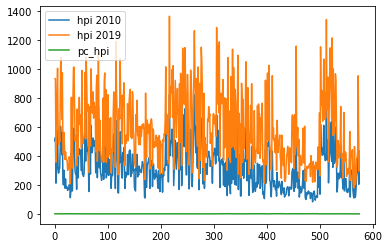

In [63]:
# try to see what it would look like plotted 
# i do not know how to interpret the plot 
fhfa.plot()

In [64]:
# crucial step that is needed to make sure we can map the data 
fhfa_web_mercator = fhfa.to_crs(epsg=3857) 

AttributeError: 'DataFrame' object has no attribute 'to_crs'

In [65]:
# addressing the error as there is no Dataframe
from geopandas import GeoDataFrame

In [66]:
# updating the fhfa data so it is a dataframe
fhfa = GeoDataFrame(fhfa)

In [67]:
# trying again to see if it worked
fhfa_web_mercator = fhfa.to_crs(epsg=3857)

<AxesSubplot:>

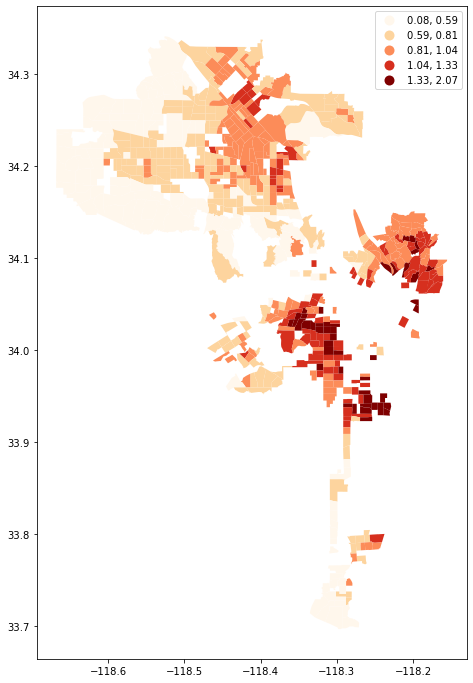

In [68]:
# plottin the percent change variable to see what it would look like 
fhfa.plot(figsize=(12,12),column='pc_hpi', legend=True,scheme='NaturalBreaks',cmap='OrRd')

Interesting! From 2010 to 2019, we see the housing price index increase the MOST around South and Southeast LA, not fully sure without seeing the street because I am not familiary with LA. I am not sure why there is a gap in the data there.

<AxesSubplot:>

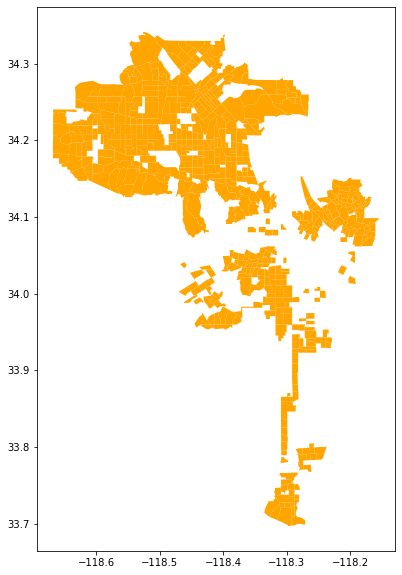

In [69]:
# i wanted to map only the positive increase in percent change of the housing price index. 
fhfa[fhfa['pc_hpi'] > 0].plot(figsize=(12,10),color="orange")

Mapping only the positive increase in percent change of the housing price index was not as helpful or informative as I thought it would be. For the next map, I am going to map the increase, decrease, and constant trends. For increasing hpi, we made the color red. For decreasing, we made the color blue. For constant/no change, we made it yellow. 

/opt/conda/lib/python3.9/site-packages/geopandas/plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


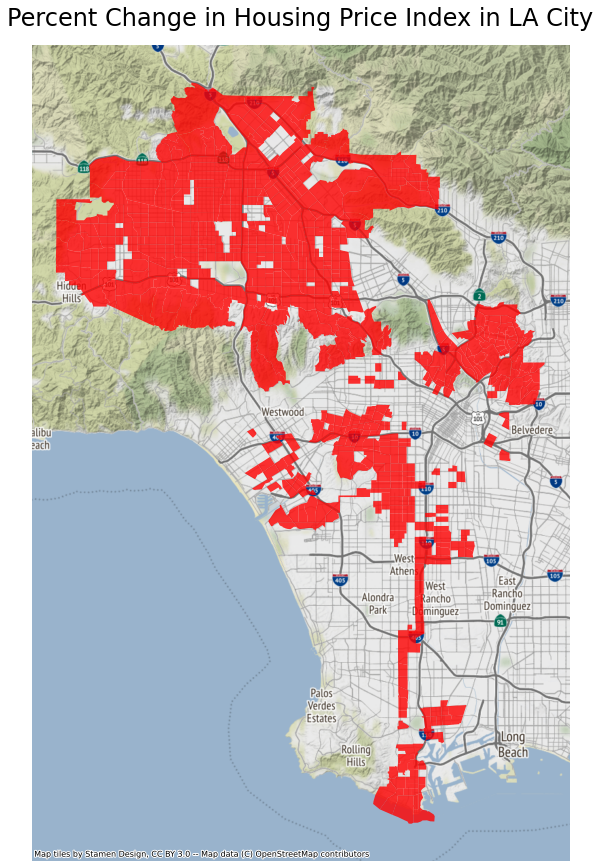

In [70]:
# use subplots that make it easier to create multiple layered maps
fig, ax= plt.subplots(figsize=(15,15))

# add the layer with ax=ax in the argument 
fhfa_web_mercator = fhfa.to_crs(epsg=3857)
fhfa_web_mercator[fhfa_web_mercator ['pc_hpi'] > 0].plot(ax=ax, color='red',alpha=0.8)
fhfa_web_mercator[fhfa_web_mercator ['pc_hpi'] < 0].plot(ax=ax, color='blue',alpha=0.5)
fhfa_web_mercator[fhfa_web_mercator ['pc_hpi'] == 0].plot(ax=ax, color='yellow',alpha=0.5)
                                            
# turn off axis
ax.axis ('off')
                                            
#set a title
ax.set_title('Percent Change in Housing Price Index in LA City', fontsize=24,pad=20)

#add basemap
ctx.add_basemap(ax)

There are no traces of any other color except for red which means there has only been an increase in housing prices. I am going to check the data to double check. 

In [71]:
# sorting the percent change from smallest to largest.
fhfa= fhfa.sort_values(by='pc_hpi',ascending= True)

In [72]:
fhfa[['pc_hpi']].head(5)

,pc_hpi
402,0.08
357,0.22
284,0.24
81,0.31
282,0.31


In [73]:
fhfa[['pc_hpi']].tail(5)

,pc_hpi
413,1.72
483,1.75
417,1.83
493,1.87
492,2.07


It seems there is no percent change that is below zero, in other words, no decrease. There is also no percent change that is 0. This does explain why the map is all red.

## WE DID IT! We cleaned the data, merged the data, and mapped the data.

### The next step is to add the parks data layer. Thank you for Ariana for finding and working with the parks data. I am following her week 4 notebook.

In [74]:
# importing the data
parks = gpd.read_file('SoCalParks.zip')
parks.to_file('SoCalParks.geojson', driver='GeoJSON')

<AxesSubplot:>

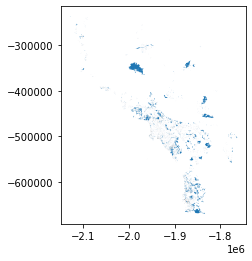

In [75]:
parks.plot()

This map is not very useful because it is just a sea of specs, but I am glad that it does plot.

In [76]:
parks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6412 entries, 0 to 6411
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    6412 non-null   int64   
 1   ParkID      6412 non-null   object  
 2   GISTrkrID   6412 non-null   int64   
 3   SourceID    6412 non-null   int64   
 4   Park_Name   6407 non-null   object  
 5   Park_Desig  6412 non-null   object  
 6   Park_Owner  6411 non-null   object  
 7   Park_Local  6411 non-null   object  
 8   Park_Manag  6411 non-null   object  
 9   Park_Loc_1  6409 non-null   object  
 10  Park_Acces  6412 non-null   int64   
 11  Park_Statu  6412 non-null   object  
 12  Park_Land_  6412 non-null   int64   
 13  Park_Est_D  142 non-null    object  
 14  Park_Size_  6412 non-null   float64 
 15  Park_Size1  6412 non-null   float64 
 16  Park_Siz_1  6412 non-null   float64 
 17  Park_Addre  2621 non-null   object  
 18  Park_State  6406 non-null   object  
 19

In [77]:
parks.head()

,OBJECTID,ParkID,GISTrkrID,SourceID,Park_Name,Park_Desig,Park_Owner,Park_Local,Park_Manag,Park_Loc_1,...,SUM_AMERIN,SUM_ASIAN_,SUM_PACIFI,SUM_OTHRAC,SUM_RACE2U,SUM_HISP_S,PLACEKEY,Shape_Leng,Shape_Area,geometry
0,21881,0622678-0033,3941,33,Encinitas Ranch Community Use Site,HCA,CITY,"Encinitas, City of",CITY,"Encinitas, City of",...,2.0,154.0,1.0,2.0,43.0,309.0,@5z5-pz2-t35,1238.601898,38389.000929,"MULTIPOLYGON (((-1877375.852 -602857.505, -187..."
1,21882,0622678-0072,3941,72,Open Space,LCA,CITY,"Encinitas, City of",CITY,"Encinitas, City of",...,0.0,0.0,0.0,0.0,0.0,0.0,@5z5-t73-q75,1726.331411,41269.897685,"POLYGON ((-1875761.267 -602210.384, -1875757.6..."
2,21883,0613392-0029,207,29,Sunridge Park,LP,CITY,CITY OF CHULA VISTA,CITY,CITY OF CHULA VISTA,...,6.0,376.0,7.0,2.0,70.0,1065.0,@5z5-wmz-m8v,786.235007,26643.407510,"POLYGON ((-1865972.612 -656289.452, -1865971.2..."
3,21884,0666000-0006,117,6,Carmel Mtn Rch Cp,LP,CITY,City of San Diego,CITY,City of San Diego,...,2.0,421.0,6.0,2.0,93.0,183.0,@5z5-pvj-pjv,1124.611677,74660.211205,"POLYGON ((-1863379.242 -616533.243, -1863340.8..."
4,21885,0601192-0002,3941,2,Wright'S Field,LP,NGO,Back Country Land Trust,NGO,Back Country Land Trust,...,7.0,20.0,2.0,0.0,21.0,147.0,@5z5-s32-5pv,7386.371789,935065.191971,"MULTIPOLYGON (((-1838769.583 -638590.002, -183..."


In [78]:
parks.tail()

,OBJECTID,ParkID,GISTrkrID,SourceID,Park_Name,Park_Desig,Park_Owner,Park_Local,Park_Manag,Park_Loc_1,...,SUM_AMERIN,SUM_ASIAN_,SUM_PACIFI,SUM_OTHRAC,SUM_RACE2U,SUM_HISP_S,PLACEKEY,Shape_Leng,Shape_Area,geometry
6407,133154,0636770-0411,0,0,Vista Bonita Park,LP,UNIV,Regents of the University of California,UNIV,Regents of the University of California,...,0.0,1539.0,0.0,7.0,163.0,342.0,@5z6-2r8-y9z,1007.410725,17738.953084,"POLYGON ((-1910654.142 -525675.821, -1910653.5..."
6408,133155,0636770-0412,0,0,UCI Neighborhood Park,LP,UNIV,Regents of the University of California,UNIV,Regents of the University of California,...,0.0,847.0,0.0,2.0,86.0,202.0,@5z6-2rf-gx5,559.707989,11970.519264,"POLYGON ((-1910437.027 -523753.915, -1910445.2..."
6409,133156,0636770-0432,0,0,UCI Neighborhood Park,LP,UNIV,Regents of the University of California,UNIV,Regents of the University of California,...,0.0,874.0,0.0,5.0,95.0,185.0,@5z6-2r8-y35,178.306652,1570.808933,"POLYGON ((-1910836.734 -525918.674, -1910832.6..."
6410,133157,0636770-0419,0,0,University Hills Los Trancos,LP,UNIV,Regents of the University of California,UNIV,Regents of the University of California,...,0.0,2308.0,0.0,6.0,236.0,532.0,@5z6-2r8-59f,184.138683,789.732815,"POLYGON ((-1910448.203 -525313.362, -1910470.9..."
6411,133288,0644000-0807,0,0,Los Angeles River Greenway,LP,CITY,LAPRD,CITY,LAPRD,...,17.0,589.0,1.0,19.0,276.0,677.0,@5z4-zfv-9xq,1857.443043,12387.321089,"POLYGON ((-1944484.996 -456807.625, -1944486.3..."


In [79]:
parks['Park_Name'] = parks ['Park_Name'].astype(str)
parks['Park_Desig'] = parks ['Park_Desig'].astype(str)
parks['Park_Owner'] = parks ['Park_Owner'].astype(str)
parks['Park_Local'] = parks ['Park_Local'].astype(str)
parks['Park_Manag'] = parks ['Park_Manag'].astype(str)
parks['Park_Loc_1'] = parks ['Park_Loc_1'].astype(str)
parks['Park_Statu'] = parks ['Park_Statu'].astype(str)
parks['Park_Est_D'] = parks ['Park_Est_D'].astype(str)
parks['Park_Addre'] = parks ['Park_Addre'].astype(str)
parks['Park_State'] = parks ['Park_State'].astype(str)
parks['Park_Sta_1'] = parks ['Park_Sta_1'].astype(str)
parks['Park_Count'] = parks ['Park_Count'].astype(str)   
parks['Park_Cou_1'] = parks ['Park_Cou_1'].astype(str)     
parks['Park_Place'] = parks ['Park_Place'].astype(str)
parks['Park_Pla_1'] = parks ['Park_Pla_1'].astype(str)   
parks['Park_Urb_1'] = parks ['Park_Urb_1'].astype(str)     
parks['Park_Zip'] = parks ['Park_Zip'].astype(str)
parks['Park_Bound'] = parks ['Park_Bound'].astype(str)   
parks['Park_Sourc'] = parks ['Park_Sourc'].astype(str)     
parks['Park_Feedb'] = parks ['Park_Feedb'].astype(str)
parks['Park_DateA'] = parks ['Park_DateA'].astype(str) 
parks['DataShare_'] = parks ['DataShare_'].astype(str)

Changing the dataype is crucial as the object datatype does not map. For the next cell, we are mapping the 'Park_Urban' column.

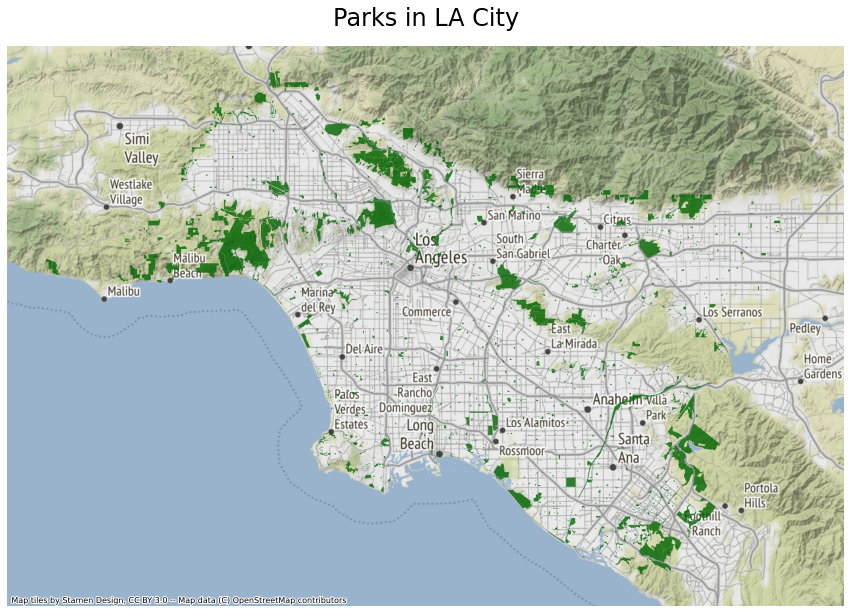

In [81]:
parks_web_mercator = parks.to_crs(epsg=3857) 
fig, ax = plt.subplots(figsize=(15, 15))

 
parks_web_mercator[parks_web_mercator['Park_Urban'] == 'Los Angeles--Long Beach--Anaheim, CA'].plot(                                      
                                                               ax=ax,
                                                               color="darkgreen",
                                                               alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Parks in LA City',fontsize=24,pad=20)

# add a basemap
ctx.add_basemap(ax)

It mapped. Next, I will be adding the park layer to the housing price map I did earlier. 

/opt/conda/lib/python3.9/site-packages/geopandas/plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


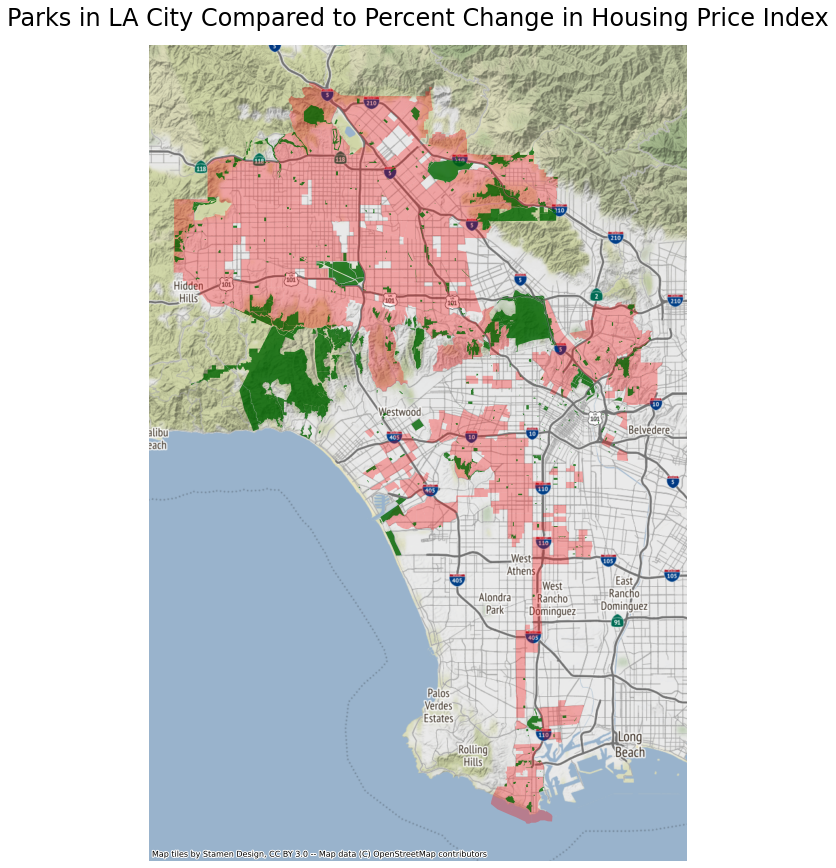

In [82]:
parks_web_mercator = parks.to_crs(epsg=3857) 
fhfa_web_mercator = fhfa.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
fhfa_web_mercator[fhfa_web_mercator ['pc_hpi'] > 0].plot(ax=ax, color='red',alpha=0.3)
fhfa_web_mercator[fhfa_web_mercator ['pc_hpi'] < 0].plot(ax=ax, color='blue',alpha=0.3)
fhfa_web_mercator[fhfa_web_mercator ['pc_hpi'] == 0].plot(ax=ax, color='yellow',alpha=0.3)
parks_web_mercator[parks_web_mercator['Park_Place'] == 'Los Angeles city'].plot(ax=ax, color="darkgreen",alpha= 0.8)
                                            
# turn off axis
ax.axis ('off')
                                            
#set a title
ax.set_title('Parks in LA City Compared to Percent Change in Housing Price Index', fontsize=24,pad=20)

#add basemap
ctx.add_basemap(ax)


The map is not as informative as I thought it would. I think it is missing something. I really liked the natural break map I did earlier because the higher intensity of color showed there was a higher impact. So for the next map, I will be incorporating a gradient element because I think it tells more of a story.

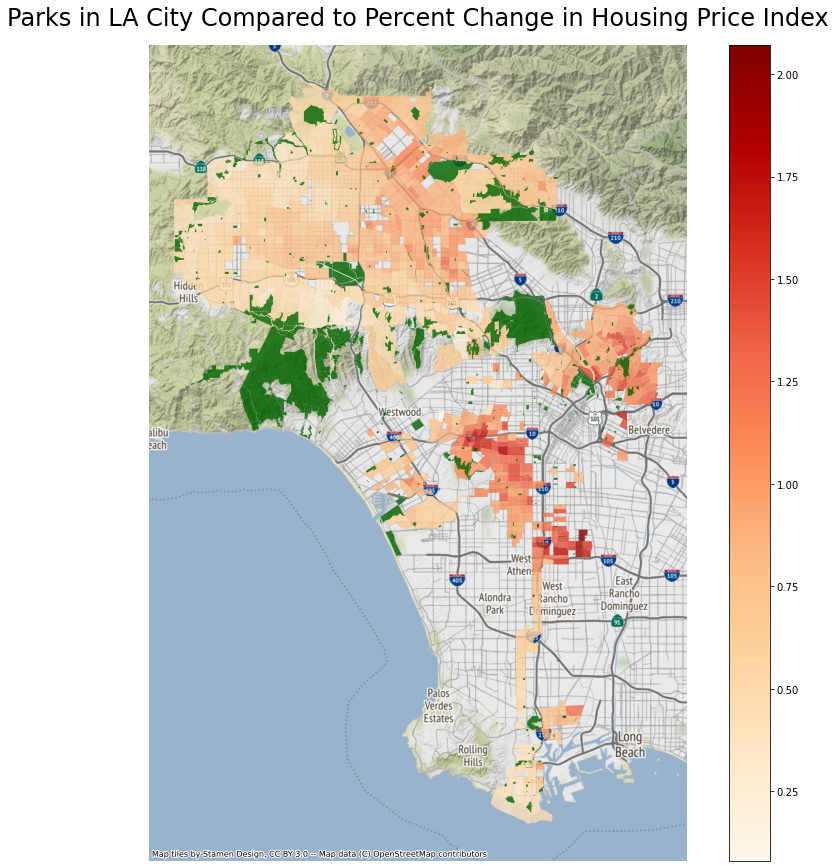

In [83]:
parks_web_mercator = parks.to_crs(epsg=3857)
fhfa_web_mercator = fhfa.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
fhfa_web_mercator = fhfa.to_crs(epsg=3857)
fhfa_web_mercator.plot(ax=ax,column='pc_hpi', cmap='OrRd', legend=True,alpha=0.8)
parks_web_mercator[parks_web_mercator['Park_Place'] == 'Los Angeles city'].plot(ax=ax, color="darkgreen",alpha= 0.8)
                                            
# turn off axis
ax.axis ('off')
                                            
#set a title
ax.set_title('Parks in LA City Compared to Percent Change in Housing Price Index', fontsize=24,pad=20)

#add basemap
ctx.add_basemap(ax)

I really like this map because we get more of the story, housing prices increased the most in the South and Southeast region in LA City. What we see in this map is that the areas with the highest increase does not necessarily have the most access to parks.

### Division of Labor

**Ariana**: Tenure and Parks mapping. Ariana calculated the percentage change in renters. She also downloaded the parks data from The Trust of Public Land's website. She figured out that the 'Park_Place' column is the most relevant for this project.

**Sim**: Housing Price Index and Parks Mapping. I used the Federal Housing Finance Agency data to calculate the percent change in housing prices from 2010 to 2019. 